# LU Decomposition

Imagine you're an engineer tasked with simulating the behavior of a complex mechanical system or a computer scientist working on optimizing algorithms for image processing. In both scenarios, you encounter large sets of linear equations that need to be solved repeatedly with different inputs.

**LU-Decomposition** is a powerful technique that plays a pivotal role in solving linear systems of equations and other matrix-related problems. It can significantly simplify these tasks, making them more efficient and less error-prone.

In this topic, you will delve into the intricacies of **LU-Decomposition**, from its definition and purpose to practical applications and real-world examples.

## Definition of LU-Decomposition

Imagine solving a system of linear equations like this:

$$
\begin{aligned}
2x + 3y + z &= 8 \\
4x + 7y + 5z &= 20 \\
2x + 5y + 2z &= 10
\end{aligned}
$$

The traditional approach involves applying elementary row operations followed by back-substitution. While effective, this process can become cumbersome and computationally expensive for large systems.

**LU-Decomposition** streamlines this procedure by breaking the problem into two simpler and more structured steps.


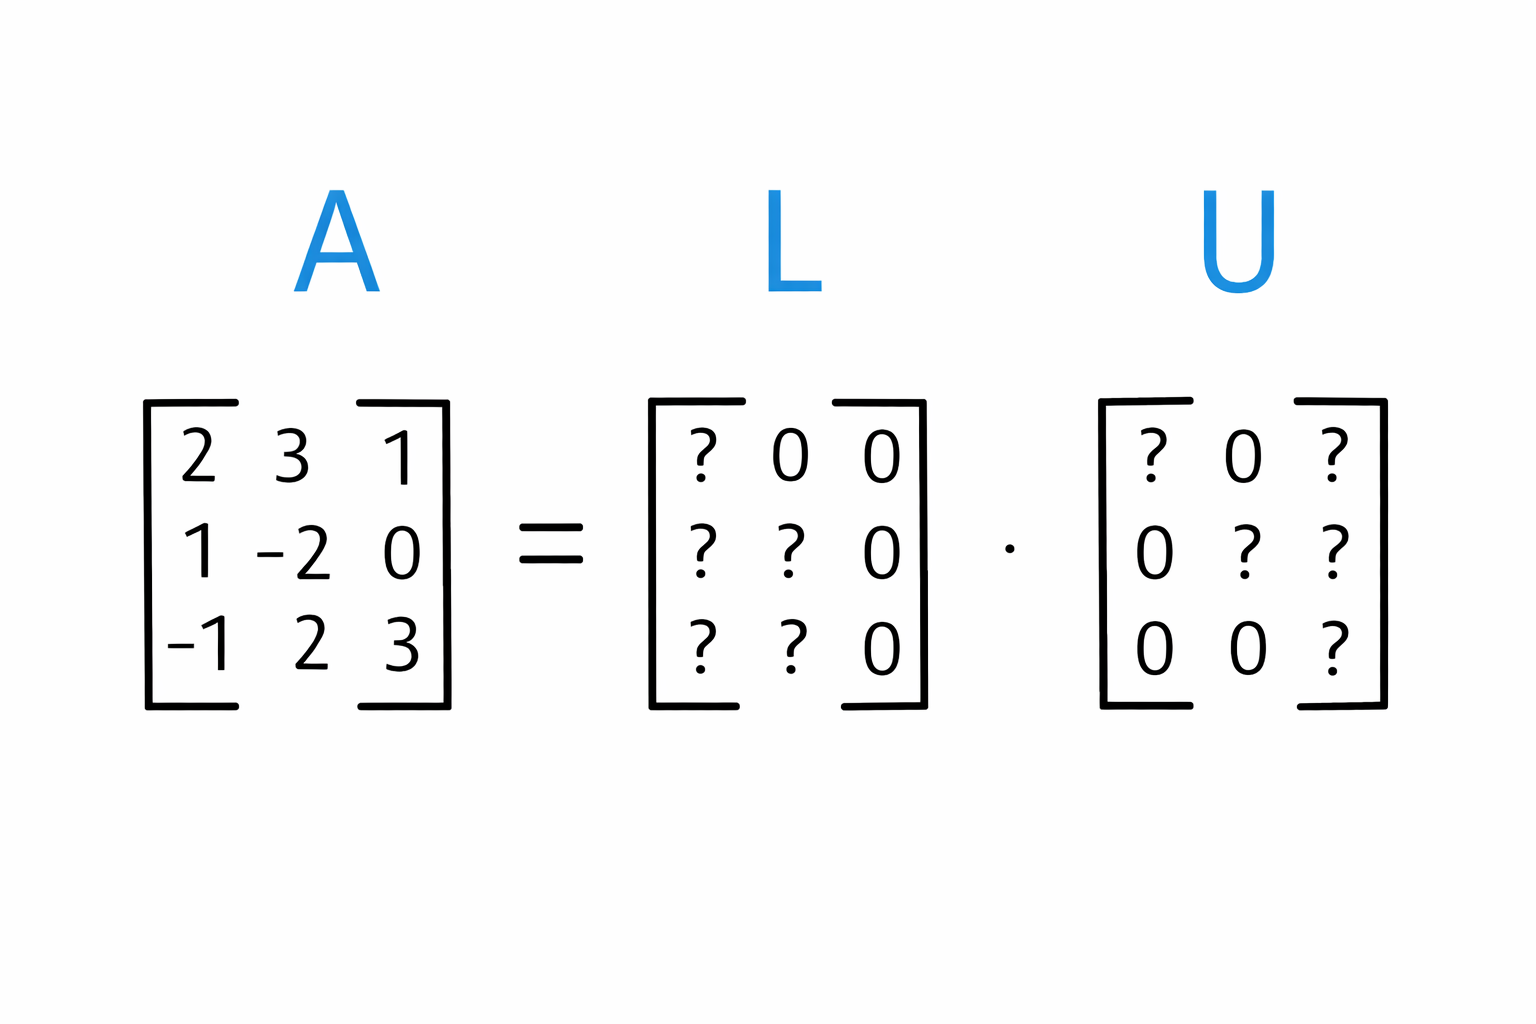



### Core Idea

At its core, LU-Decomposition is a method for factorizing a square matrix $A$ into the product of two matrices:

$$
A = LU
$$

where:

- $L$ is a **lower triangular matrix** (entries above the main diagonal are zero),
- $U$ is an **upper triangular matrix** (entries below the main diagonal are zero).

This factorization transforms the original system

$$
Ax = b
$$

into two easier systems:

1. $Ly = b$  (forward substitution),
2. $Ux = y$  (back substitution).

Each step is computationally efficient and numerically stable compared to solving the original system directly.

### Why LU-Decomposition Matters

- It reduces computational complexity when solving multiple systems with the same coefficient matrix but different right-hand sides.
- It forms the basis of many numerical algorithms used in scientific computing.
- It provides a clean structural interpretation of Gaussian elimination.


### Example Setup

Suppose you are given a square matrix $A$. The goal of LU-Decomposition is to express $A$ as the product of two unknown matrices $L$ and $U$:

$$
A = LU
$$

where $L$ is lower triangular and $U$ is upper triangular.

## Step 1: Gaussian Elimination for $U$

In the LU-Decomposition process, constructing the upper triangular matrix
$U$ is the first step. We've already discussed the use of Gaussian Elimination to perform this step, but let's delve into it in more detail:

1. The core of constructing $U$ involves applying Gaussian Elimination to the matrix
$A$. The goal is to transform $A$ into an upper triangular form, where all entries below the main diagonal become zeros.
During Gaussian Elimination, row operations are performed to eliminate the entries below the main diagonal. This process involves subtracting multiples of one row from another row to create zeros below the main diagonal. These multipliers are essential for constructing
$L$, therefore, you should remember them!

2. After completing the Gaussian Elimination process, the resulting
$U$ matrix will have zeros below the main diagonal and non-zero entries on or above the main diagonal. These non-zero entries represent the coefficients of the linear equations in the system.

In our example, taking these steps will result in the matrix
$U$:


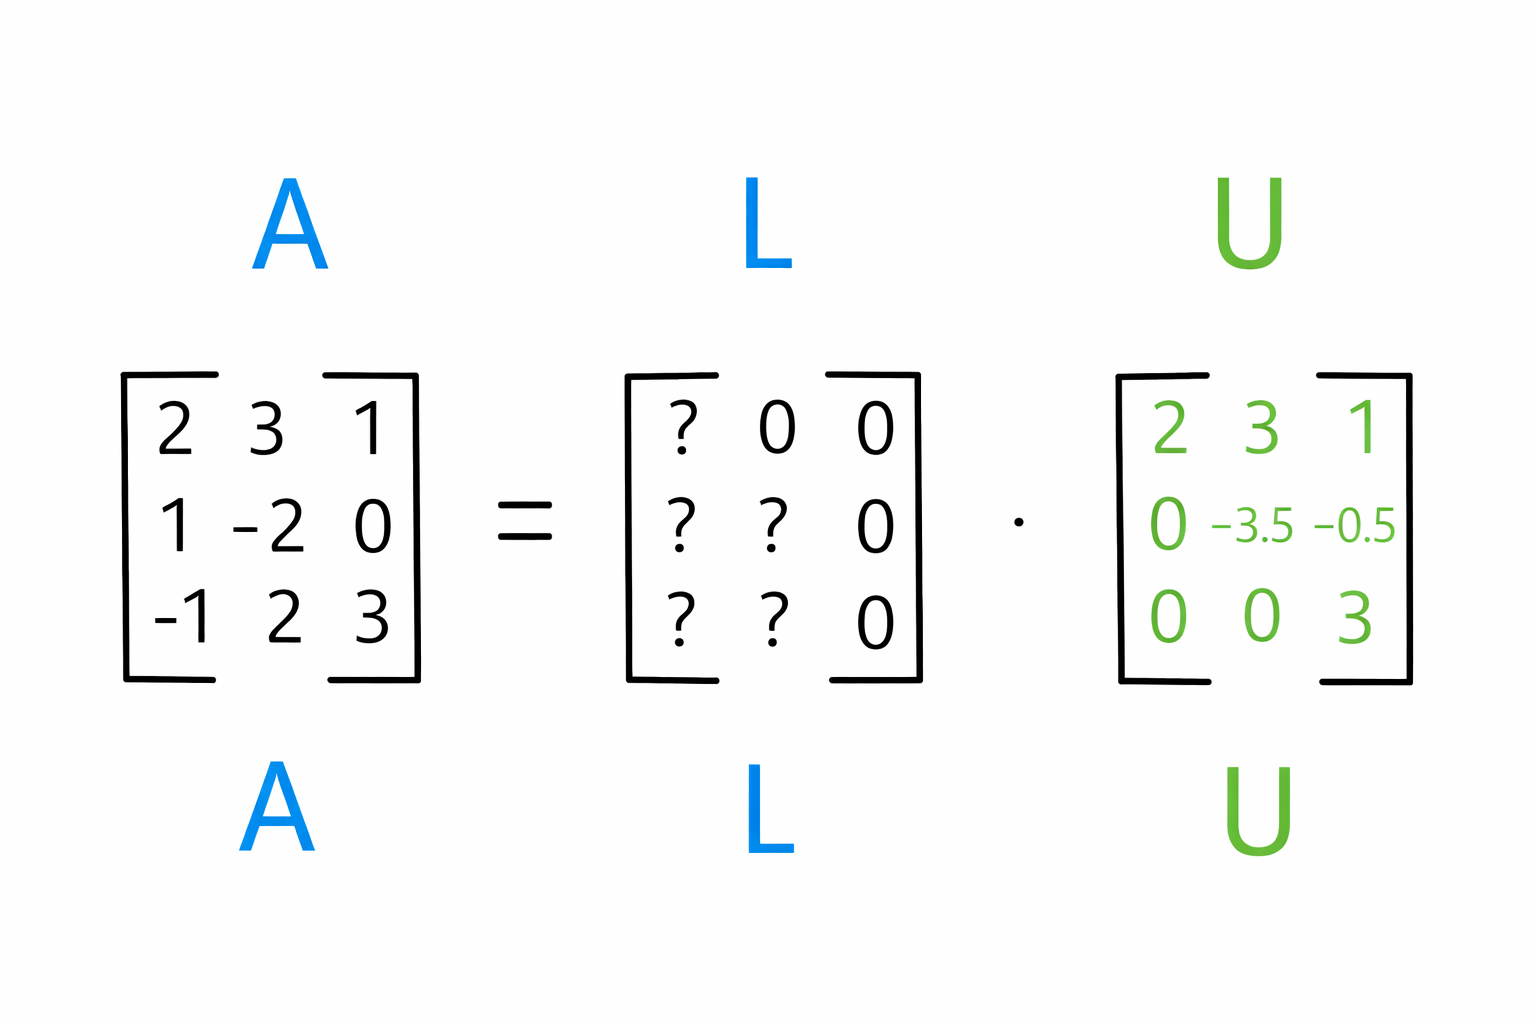


## Step 2: Constructing $L$

Once you've performed Gaussian Elimination on the original square matrix
$A$ to obtain the upper triangular matrix
$U$, you can focus on constructing the lower triangular matrix
$L$. The primary goal here is to create
$L$ in such a way that when multiplied with
$U$, it reproduces the original matrix
$A$. Let's break down the process:

1. To start constructing $L$, initialize it as an identity matrix of the same size as $A$.

2. Recall the Gaussian Elimination process you applied to $A$ to obtain $U$. During this process, you used multipliers to eliminate entries below the main diagonal of $A$. These multipliers are essential for constructing $L$.For each step of Gaussian Elimination, a multiplier is computed to make the elements below the main diagonal zero. These multipliers are stored in the corresponding positions of $L$, below the main diagonal.

3. Continue this process for each step of Gaussian Elimination until you have filled in all positions below the main diagonal of $L$. The completed $L$ matrix will be a lower triangular matrix with ones on its main diagonal and the multipliers used in Gaussian Elimination in the positions below the main diagonal.

## Example: Constructing $L$

These steps can feel abstract at first, so let’s carefully walk through a concrete example.

You are given the matrix $A$ and the resulting upper triangular matrix $U$. We begin by initializing the lower triangular matrix $L$ as the identity matrix.

### Given matrices

$$
A =
\begin{pmatrix}
2 & 3 & 1 \\
1 & -2 & 0 \\
-1 & 2 & 3
\end{pmatrix},
\qquad
U =
\begin{pmatrix}
2 & 3 & 1 \\
0 & -3.5 & -0.5 \\
0 & 0 & 3
\end{pmatrix}
$$

Initialize $L$:

$$
L =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

#### Step 1: First elimination multiplier

To transform $A$ into $U$, the first operation was subtracting row 1 multiplied by $\tfrac{1}{2}$ from row 2.

That is,
$$
R_2 \leftarrow R_2 - \tfrac{1}{2} R_1
$$

The multiplier is:
$$
m_{21} = \tfrac{1}{2}
$$

Place this multiplier in $L$ below the main diagonal:

$$
L =
\begin{pmatrix}
1 & 0 & 0 \\
0.5 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

#### Step 2: Second elimination multiplier

Next, row 1 multiplied by $-\tfrac{1}{2}$ was added to row 3:

$$
R_3 \leftarrow R_3 + \left(-\tfrac{1}{2}\right) R_1
$$

So the multiplier is:
$$
m_{31} = -\tfrac{1}{2}
$$

Insert it into $L$:

$$
L =
\begin{pmatrix}
1 & 0 & 0 \\
0.5 & 1 & 0 \\
-0.5 & 0 & 1
\end{pmatrix}
$$

#### Step 3: Third elimination multiplier

Finally, row 2 was added to row 3 to eliminate the remaining entry below the diagonal:

$$
R_3 \leftarrow R_3 + R_2
$$

The multiplier is:
$$
m_{32} = -1
$$

Insert it into $L$:

$$
L =
\begin{pmatrix}
1 & 0 & 0 \\
0.5 & 1 & 0 \\
-0.5 & -1 & 1
\end{pmatrix}
$$

#### Final result

You now have both matrices:

$$
L =
\begin{pmatrix}
1 & 0 & 0 \\
0.5 & 1 & 0 \\
-0.5 & -1 & 1
\end{pmatrix},
\qquad
U =
\begin{pmatrix}
2 & 3 & 1 \\
0 & -3.5 & -0.5 \\
0 & 0 & 3
\end{pmatrix}
$$

They satisfy the LU-Decomposition:

$$
A = LU
$$


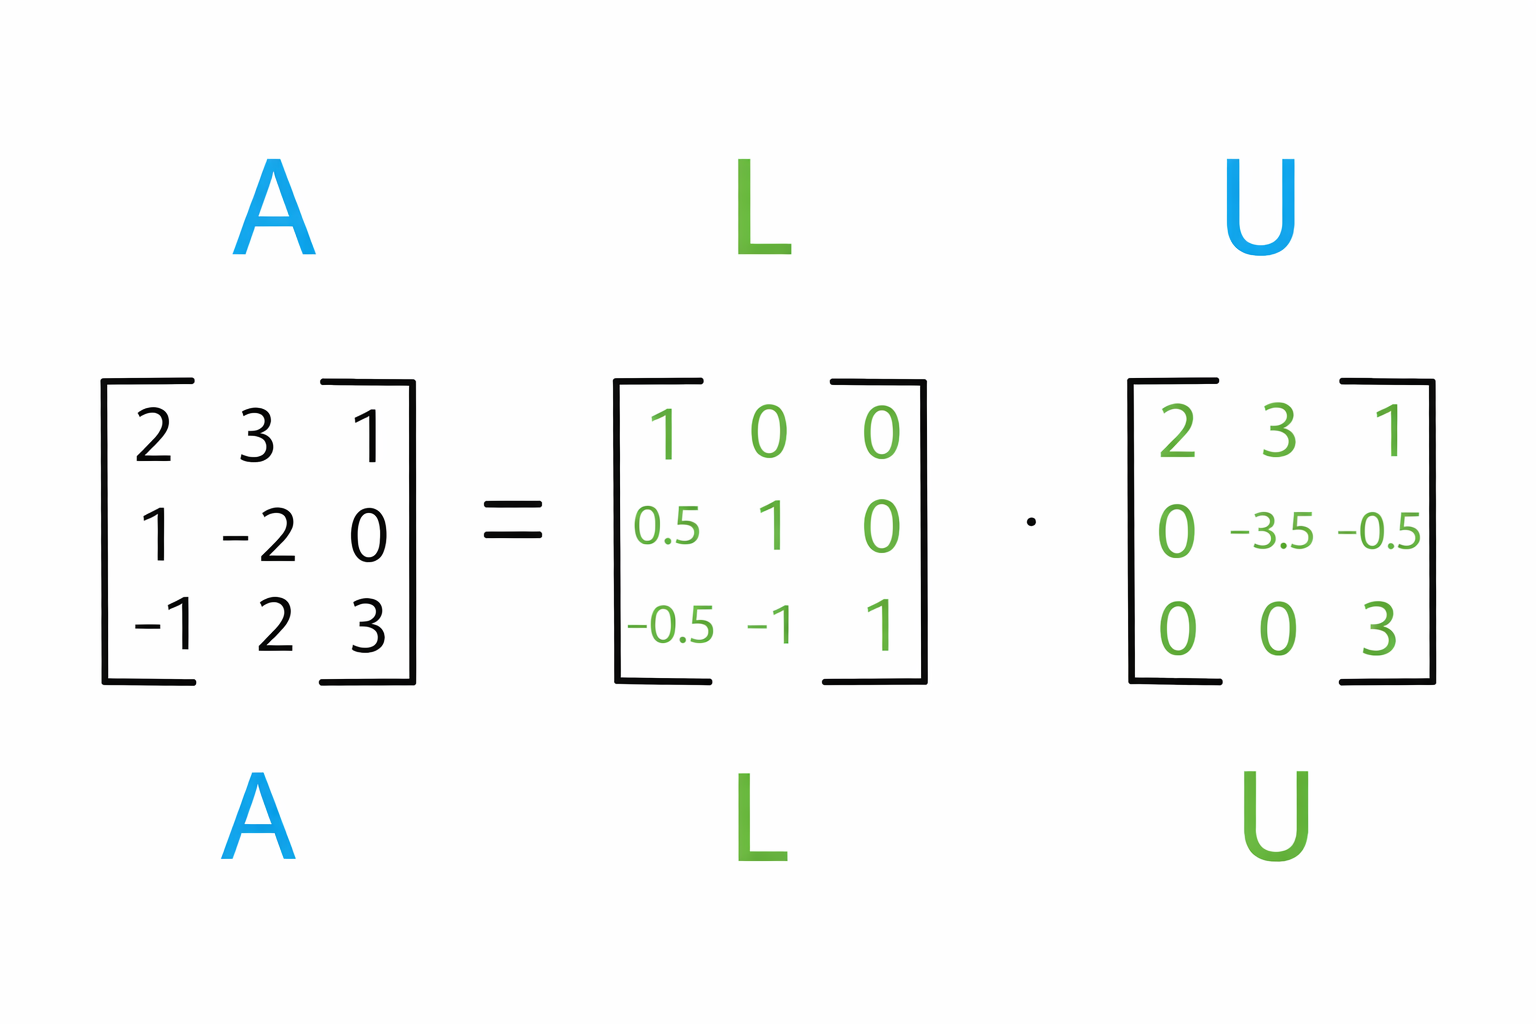



## Key takeaway

- $U$ is obtained by **performing** Gaussian Elimination.
- $L$ is obtained by **recording the multipliers** used during elimination.
- Together, $L$ and $U$ encode the full elimination process in a reusable and efficient form.

This decomposition greatly simplifies solving linear systems, computing determinants, and performing repeated calculations with the same matrix.

## Conclusion

In conclusion, **LU-Decomposition** is a powerful tool in linear algebra that simplifies complex mathematical operations involving matrices. It provides a structured and efficient approach to solving linear systems, computing matrix inverses, and calculating determinants.

The key points to remember are:

- **LU-Decomposition** is a method for factorizing a square matrix $A$ into two matrices:
  - $L$: a lower triangular matrix (with ones on the main diagonal),
  - $U$: an upper triangular matrix,
  such that
  $$
  A = LU.
  $$

- Constructing the matrix $U$ involves applying **Gaussian Elimination** to the matrix $A$.
  The goal is to transform $A$ into an upper triangular form by eliminating all entries below the main diagonal.

- During Gaussian Elimination, **multipliers** are used to eliminate entries below the diagonal.
  These multipliers are stored in the corresponding positions **below the main diagonal of $L$**.

By separating a matrix into $L$ and $U$, LU-Decomposition allows repeated linear systems with the same coefficient matrix to be solved efficiently, making it an essential technique in numerical linear algebra and practical computations.

## Numpy and Scipy to solve the example

In [ ]:
# ... existing code ...
# # <caret>
import numpy as np
from scipy.linalg import lu

# Define the matrix A from the example
A = np.array([[2, 3, 1],
              [1, -2, 0],
              [-1, 2, 3]])

# Perform LU decomposition using scipy
# P is a permutation matrix, L is lower triangular, U is upper triangular
P, L, U = lu(A)

print("Matrix A:")
print(A)
print("\nLower Triangular Matrix L:")
print(L)
print("\nUpper Triangular Matrix U:")
print(U)

# Verify the decomposition (P * L * U should equal A)
print("\nVerification (P @ L @ U):")
print(P @ L @ U)
# ... existing code ...
